In [18]:
import pandas as pd
import numpy as np
import time
import random
import matplotlib.pyplot as plt

Question 1:

The number of multiplications and addition to be performed to multiply a (n, k) and (k, m) matrix.

Solution:
Let matrix with dimension (n,k) be M1 and matrix with dimension (k,m) be M2.
Multiplication is possible as M1 x M2 resulting in a (n,m) dimensioned Matrix.

Solution:
For the multiplication, each row of M1 gets multiplied to the corresponding column of M2.
Number of elements in rows of M1: k
Number of elements in columns of M2: k

So for each row and column multiplication, 
        Multiplications are: k
        Additions are:       k-1.

For each row of the matrix, m number of such row x column multiplications have to be performed.
So number of multiplications for each row of the new matrix : m*(k)
Addition : m*(k-1).

For n such number of rows,

Multiplications: n*m*(k)
Addition:        n*m*(k-1)

Question2:

Multiplication performed using lists of lists, and using numpy.
Required: Difference in the time required for both the methods.


In [199]:
#generating a random matrix of size 8*10 and 10*8

#mat1 = np.random.rand(8,10)
#mat2 = np.random.rand(10, 8)

mat1 = []
r,c = 8,10
for a in range(r):
    #Generating r number of rows
    row = []
    for a in range(c):
        row.append(random.randint(0, 100)) 
    #print(len(row))
    mat1.append(row)

mat2 = []
r,c = 10, 10
for a in range(r):
    #Generating r number of rows
    row = []
    for a in range(c):
        row.append(random.randint(0, 100)) 
    mat2.append(row)


In [200]:
#Now generating a random numpy array with same values

np_mat1 = np.array(mat1)
np_mat2 = np.array(mat2)

In [201]:
print(mat1)

[[28, 28, 44, 12, 24, 46, 66, 97, 78, 20], [39, 28, 22, 57, 33, 34, 44, 68, 54, 27], [16, 44, 64, 89, 9, 91, 86, 66, 98, 90], [6, 54, 89, 61, 20, 81, 11, 56, 94, 81], [62, 82, 27, 73, 19, 97, 22, 24, 69, 8], [86, 80, 63, 28, 5, 19, 100, 25, 26, 86], [11, 40, 16, 38, 94, 23, 18, 18, 51, 50], [25, 9, 92, 48, 94, 36, 51, 61, 23, 72]]


In [202]:
print(np_mat1)

[[ 28  28  44  12  24  46  66  97  78  20]
 [ 39  28  22  57  33  34  44  68  54  27]
 [ 16  44  64  89   9  91  86  66  98  90]
 [  6  54  89  61  20  81  11  56  94  81]
 [ 62  82  27  73  19  97  22  24  69   8]
 [ 86  80  63  28   5  19 100  25  26  86]
 [ 11  40  16  38  94  23  18  18  51  50]
 [ 25   9  92  48  94  36  51  61  23  72]]


For multiplication of lists(nested), I have defined a function named multiplication, while for multiplication of numpy matrix, I have used inbuilt function.

Reference: https://docs.python.org/3/library/timeit.html - Reference for counting the running time of a snippet of a code.

In [203]:
def multiplication(mat1, mat2):
    r = len(mat1)
    c = len(mat1[0])
    r2 = c
    c2 = len(mat2[0])
    #new matrix named final_matrix
    final_matrix = []

    for a in range(r):
        row = mat1[a]
        new_r = []
        for b in range(c2):
            sum = 0
            for alpha in range(r2):
                sum = sum + row[alpha]*mat2[alpha][b]
                
            new_r.append(sum)
        final_matrix.append(new_r)
    return final_matrix
      

In [204]:
final_ans= multiplication(mat1, mat2)
for a in final_ans:
    print(a)

[21308, 20982, 18125, 27225, 19131, 24517, 15041, 22364, 17094, 20379]
[18108, 18406, 17614, 26127, 18059, 20797, 13189, 21367, 14286, 18170]
[33778, 30522, 32508, 39898, 32582, 33848, 13331, 38034, 20360, 24168]
[26615, 25031, 31073, 31343, 26351, 29277, 8802, 34524, 21359, 16340]
[19185, 21045, 26723, 28374, 19363, 26826, 10625, 30955, 19232, 16202]
[23425, 20295, 27411, 30060, 21786, 25625, 14849, 24855, 20401, 17130]
[13573, 13401, 18137, 23071, 15312, 19314, 8371, 16907, 14538, 9723]
[23781, 19171, 24473, 27994, 19372, 24392, 14639, 24678, 19749, 15661]


In [205]:
%timeit multiplication(mat1, mat2)


28.3 μs ± 363 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [206]:
def numpy_mult(mat1, mat2):
    final_mat = mat1@mat2
    return final_mat

In [207]:
final_mat = numpy_mult(np_mat1, np_mat2)
print(final_mat)

[[21308 20982 18125 27225 19131 24517 15041 22364 17094 20379]
 [18108 18406 17614 26127 18059 20797 13189 21367 14286 18170]
 [33778 30522 32508 39898 32582 33848 13331 38034 20360 24168]
 [26615 25031 31073 31343 26351 29277  8802 34524 21359 16340]
 [19185 21045 26723 28374 19363 26826 10625 30955 19232 16202]
 [23425 20295 27411 30060 21786 25625 14849 24855 20401 17130]
 [13573 13401 18137 23071 15312 19314  8371 16907 14538  9723]
 [23781 19171 24473 27994 19372 24392 14639 24678 19749 15661]]


In [208]:
%timeit numpy_mult(np_mat1, np_mat2)

783 ns ± 26.5 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


As, we can observe, numpy is exceptionally fast in multiplyting matrices.
The reason behind this are:

The main reason behind this being the homogeneity in the data that are being stored in the arrays as compared to the heterogenous data stored in nested lists. In such cases, as the properties of elements need to be stored once rather than allocating the storage for properties of every element, this optimizes memory and thus the performance.

Also, the way in which numpy executes, by fragmentation and processing parallely makes it quite efficient as compared to nested lists.

Reference: https://www.geeksforgeeks.org/why-numpy-is-faster-in-python/

Question 3

In [54]:
int_list = [58, 6, 25, 89, 7, 13, 100, 11, 73, 49]
#assuming distinct elements, if not, then multiple elements can be deleted by refining the list using the following function

def refining(lst1):
    final_list = []
    for a in lst1:
        if a not in final_list:
            final_list.append(a)
    return final_list

int_list = refining(int_list)
print(int_list)

def median(int_list):
    #we need to keep on finding max elements.
    len_list = len(int_list)
    min_ele = min(int_list)
    max_ele = max(int_list)
    sorted_list = [max_ele]
    while True:
        if len(sorted_list) == len_list:
            break
        else:
            ele = min_ele
            for a in int_list:
                if a>ele and a<sorted_list[-1]:
                    ele = a
                else:
                    pass
            sorted_list.append(ele)
        print

                
    
    if len_list%2==0:
        return (sorted_list[int(len_list/2)] + sorted_list[int(len_list/2) - 1])/2
    else:
        return (sorted_list[int(len_list//2)])            

[58, 6, 25, 89, 7, 13, 100, 11, 73, 49]


In [55]:
median_ans = median(int_list)
print(median_ans)

37.0


Time complexity to find the median is as follows:

O(n) in finding max and min element from the list.
Then each time we traverse thru all the elements, we compare the higher and higher elements each time, such that they shud be smaller than the previous larger element.

Also, the while loop runs for n times. (we ignore time requried for min and maz)
Hence, n*O(n), that is O(n^2)

In [56]:
%timeit median(int_list)

1.94 μs ± 34.6 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [57]:
def opt_median(int_list):
    #using O(nlogn) mechanism
    int_list.sort()
    len_list = len(int_list)
    if len_list%2==0:
        return (int_list[int(len_list/2)] + int_list[int(len_list/2) - 1])/2
    else:
        return (int_list[int(len_list//2)])

In [58]:
median_ans = opt_median(int_list)
print(median_ans)

37.0


In [59]:
%timeit opt_median(int_list)

138 ns ± 0.877 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [60]:
#Finding using numpy
int_list  = np.array(int_list)
def numpy_median(int_list):
    return np.median(int_list)


In [61]:
median_ans = numpy_median(int_list)
print(median_ans)

37.0


In [209]:
%timeit numpy_median(int_list)

3.63 μs ± 82.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


This is an exception case, but numpy.median() is taking more time to fetch the result that nomral code written.

Question 4

x^2 * y + y^3*sin(x)
Taking Partial derivative with respect to x, gives gradient with respect to x and same goes of y   

Partial Derivative wrt to x, which is equal to gradient with respect to x
$$
\frac{\partial}{\partial x} (x^2 y) + \frac{\partial}{\partial x} (y^3 \sin(x)) = 2xy + y^3\cos(x)
$$

Partial Derivative wrt to x, which is equal to gradient with respect to y
$$
\frac{\partial}{\partial y} (x^2 y) + \frac{\partial}{\partial y} (y^3 \sin(x)) = x^2 + 3y^2\sin(x)
$$

Question 5
Reference for JAX:
https://jax.readthedocs.io/en/latest/automatic-differentiation.html

In [89]:
random_val_x = [58, 6, 25, 89, 7]
random_val_y = [ 13, 100, 11, 73, 49]

In [90]:
#Finding derivative using our solution.

def function_grad_self_x(x,y):
    return 2*x*y + y**2*np.cos(x)

def function_grad_self_y(x,y):
    return x**2 + 3*y**2*np.sin(x)

gradient_self_x = []
gradient_self_y = []
for a in range(len(random_val_x)):
    gradient_self_x.append(function_grad_self_x(random_val_x[a],random_val_y[a]))
    gradient_self_y.append(function_grad_self_y(random_val_x[a],random_val_y[a]))
    

In [91]:
print(gradient_self_x)
print(gradient_self_y)

[np.float64(1528.1414428908504), np.float64(10801.70286650366), np.float64(669.9355402354803), np.float64(15712.733472494154), np.float64(2496.1193126782746)]
[np.float64(3867.3864325788604), np.float64(-8346.464945967777), np.float64(576.9563147145084), np.float64(21670.92959072369), np.float64(4781.274470571438)]


In [6]:
import jax
import jax.numpy as jnp
from jax import grad

First we calculate gradient wrt x

Reference : https://youtu.be/juo5G3t4qAo?feature=shared

In [93]:
lleng = len(random_val_x)

def function_grad(x,y):
    return (x**2)*y + (y**3)*jnp.sin(x)
random_val_x = jnp.asarray(random_val_x,dtype=float)
random_val_y = jnp.asarray(random_val_y,dtype=float)

In [94]:
grad_dx = jax.grad(function_grad)

gradient_values_x = []
for a in range(lleng):
    gradient_values_x.append(grad_dx(random_val_x[a],random_val_y[a]))

print(gradient_values_x)

[Array(1769.8387, dtype=float32), Array(961370.25, dtype=float32), Array(1869.291, dtype=float32), Array(211461.53, dtype=float32), Array(89381.84, dtype=float32)]


In [95]:
grad_dy = jax.grad(function_grad, argnums=1)
gradient_values_y = []
for a in range(lleng):
    gradient_values_y.append(grad_dy(random_val_x[a],random_val_y[a]))
print(gradient_values_y)

[Array(3867.3865, dtype=float32), Array(-8346.465, dtype=float32), Array(576.9563, dtype=float32), Array(21670.93, dtype=float32), Array(4781.2744, dtype=float32)]


As we can observe the solution obtained using JAX, and the solution which I obtained, match for some of the random values of x and y.

Question6: 

Using sympy to analyze the same

In [3]:
import sympy

In [5]:
x, y = sympy.symbols("x y")
f_x_y = x**2 * y + y**3 * sympy.sin(x)


grad_dx = sympy.diff(f_x_y,x)
grad_dy = sympy.diff(f_x_y,y)

display(grad_dx)
display(grad_dy)

2*x*y + y**3*cos(x)

x**2 + 3*y**2*sin(x)

Question7:

Creating nested dictionary

In [1]:
#creating a nested dictionary.

dict_classes = {2022:{"branch1":{"Roll Number":1, "Name":"N","Marks":{"Maths":100, "English":70, "Science":90}}},2022:{"branch2":{"Roll Number":2, "Name":"M","Marks":{"Maths":90, "English":80, "Science":90}}}
                ,2023:{"branch1":{"Roll Number":1, "Name":"N","Marks":{"Maths":80, "English":90, "Science":100}}},2022:{"branch2":{"Roll Number":2, "Name":"M","Marks":{"Maths":100, "English":90, "Science":95}}}
                ,2024:{"branch1":{"Roll Number":1, "Name":"N","Marks":{"Maths":100, "English":80, "Science":87}}},2022:{"branch2":{"Roll Number":2, "Name":"M","Marks":{"Maths":70, "English":90, "Science":85}}}
                ,2025:{"branch1":{"Roll Number":1, "Name":"N","Marks":{"Maths":85, "English":98, "Science":100}}},2022:{"branch2":{"Roll Number":2, "Name":"M","Marks":{"Maths":60, "English":100, "Science":100}}}
                }
print(dict_classes)


{2022: {'branch2': {'Roll Number': 2, 'Name': 'M', 'Marks': {'Maths': 60, 'English': 100, 'Science': 100}}}, 2023: {'branch1': {'Roll Number': 1, 'Name': 'N', 'Marks': {'Maths': 80, 'English': 90, 'Science': 100}}}, 2024: {'branch1': {'Roll Number': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 80, 'Science': 87}}}, 2025: {'branch1': {'Roll Number': 1, 'Name': 'N', 'Marks': {'Maths': 85, 'English': 98, 'Science': 100}}}}


Question 8 

Reference : Python Crash Course, 3rd Edition: A Hands-On, Project-Based Introduction to Programming - Chapter: Classes

In [7]:
#First we define the year

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def branch_add(self, branch):
        self.branches.append(branch)
    
class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []
    
    def student_add(self, student):
        self.students.append(student)

class Student:
    def __init__(self, name, roll_number):
        self.name = name
        self.roll_number = roll_number
        self.marks = []

    def marks_add(self, mark):
        self.marks.append(mark)
    
class Marks:
    def __init__(self, subject, marks):
        self.subject = subject
        self.marks = marks

    

In [9]:
#The same data, in the previous case, can be stored in these classes

df = []

#adding year
yr = Year(2024)

#Adding Branch
branch = Branch("EE")
yr.branch_add(branch)

#adding students
std_1 = Student("Tejas", 335)
std_1.marks_add(Marks("DCC", 100))
std_1.marks_add(Marks("Maths", 90))

branch.student_add(std_1)

df.append(yr)

#In this way, the same data can be filled in a more organized way.

Question 9

In [19]:
x_val = np.arange(0,100.5,0.5)
print(x_val)

[  0.    0.5   1.    1.5   2.    2.5   3.    3.5   4.    4.5   5.    5.5
   6.    6.5   7.    7.5   8.    8.5   9.    9.5  10.   10.5  11.   11.5
  12.   12.5  13.   13.5  14.   14.5  15.   15.5  16.   16.5  17.   17.5
  18.   18.5  19.   19.5  20.   20.5  21.   21.5  22.   22.5  23.   23.5
  24.   24.5  25.   25.5  26.   26.5  27.   27.5  28.   28.5  29.   29.5
  30.   30.5  31.   31.5  32.   32.5  33.   33.5  34.   34.5  35.   35.5
  36.   36.5  37.   37.5  38.   38.5  39.   39.5  40.   40.5  41.   41.5
  42.   42.5  43.   43.5  44.   44.5  45.   45.5  46.   46.5  47.   47.5
  48.   48.5  49.   49.5  50.   50.5  51.   51.5  52.   52.5  53.   53.5
  54.   54.5  55.   55.5  56.   56.5  57.   57.5  58.   58.5  59.   59.5
  60.   60.5  61.   61.5  62.   62.5  63.   63.5  64.   64.5  65.   65.5
  66.   66.5  67.   67.5  68.   68.5  69.   69.5  70.   70.5  71.   71.5
  72.   72.5  73.   73.5  74.   74.5  75.   75.5  76.   76.5  77.   77.5
  78.   78.5  79.   79.5  80.   80.5  81.   81.5  8

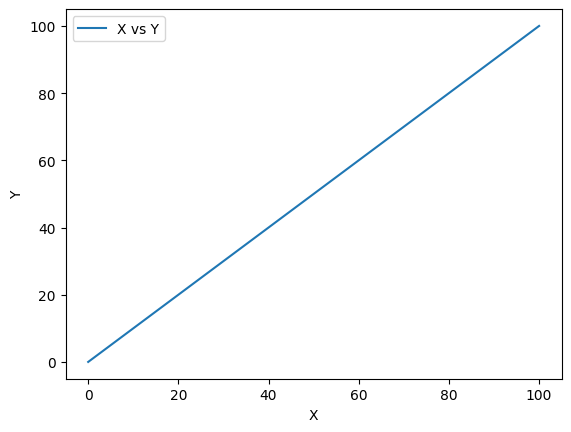

In [20]:
#plotting x=y
y_val = x_val
plt.plot(x_val, y_val, label="X vs Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

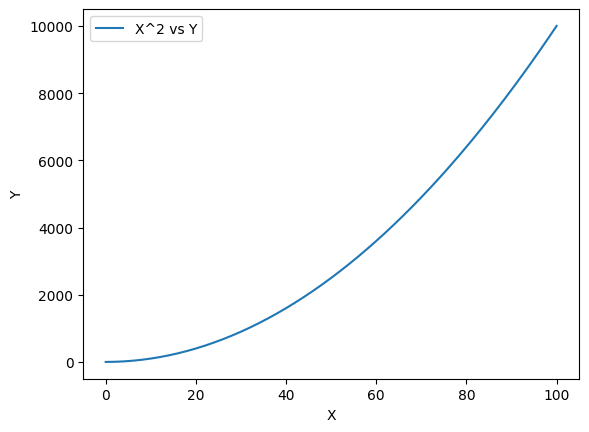

In [21]:
#plotting 

y_val_x2 = []
for a in x_val:
    y_val_x2.append(a**2)

plt.plot(x_val, y_val_x2, label="X^2 vs Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()



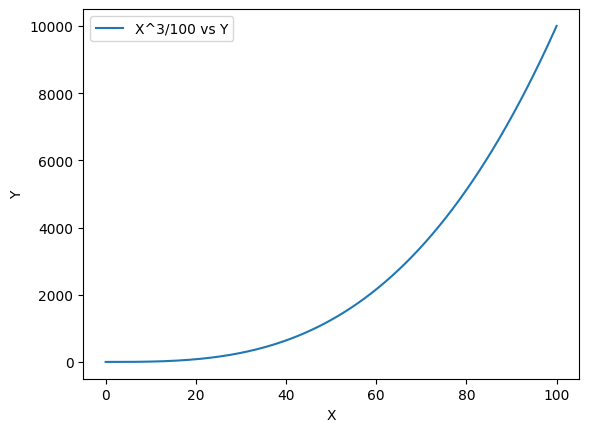

In [22]:
y_x3_100 = []
for a in x_val:
    y_x3_100.append(a**3/100)

plt.plot(x_val, y_x3_100, label="X^3/100 vs Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

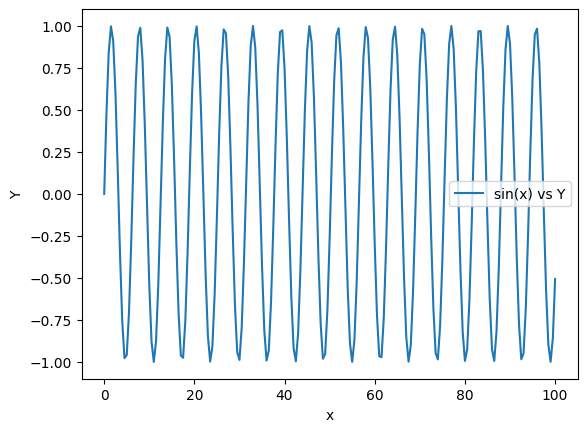

In [23]:
y_sinx = []

for a in x_val:
    y_sinx.append(np.sin(a))

plt.plot(x_val, y_sinx, label="sin(x) vs Y")
plt.xlabel("x")
plt.ylabel("Y")
plt.legend()

/var/folders/55/_kpfspls6xq0pzzm_dl4ylxc0000gn/T/ipykernel_15630/543175716.py:5: RuntimeWarning: divide by zero encountered in log10
  y_logx_10.append(np.log10(a))
/var/folders/55/_kpfspls6xq0pzzm_dl4ylxc0000gn/T/ipykernel_15630/543175716.py:6: RuntimeWarning: divide by zero encountered in log
  y_logx.append(np.log(a))


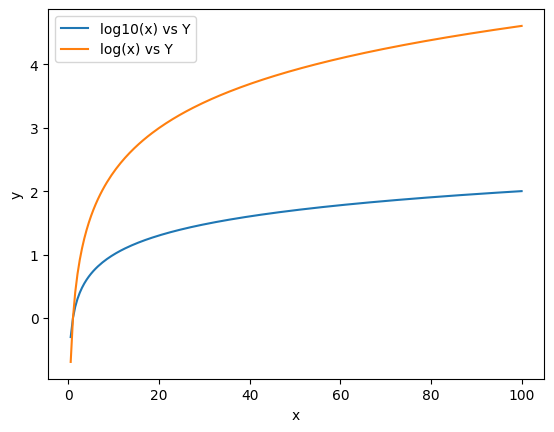

In [24]:
y_logx_10 = []
y_logx = []
for a in x_val:
    if x!=0:
        y_logx_10.append(np.log10(a))
        y_logx.append(np.log(a))

plt.plot(x_val, y_logx_10, label="log10(x) vs Y")
plt.plot(x_val, y_logx, label="log(x) vs Y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

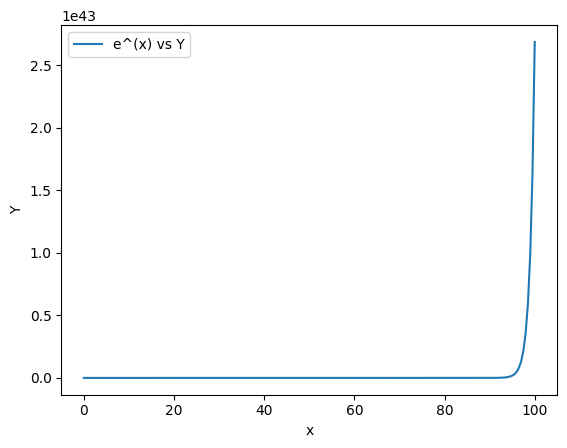

In [25]:
y_ex = []

for a in x_val:
    y_ex.append(np.e**a)

plt.plot(x_val, y_ex, label="e^(x) vs Y")
plt.xlabel("x")
plt.ylabel("Y")
plt.legend()


Question_10

In [131]:
matr = np.random.rand(20,5)*2
print(matr)

[[0.96903924 0.91085257 1.73329015 1.09258644 0.51731233]
 [0.39952347 0.78194214 0.74412449 1.93274635 1.03186708]
 [0.0054948  0.33942523 1.86393975 1.36307812 0.26353307]
 [1.35460882 1.50598784 0.73187778 1.90664645 1.55196322]
 [1.11146438 1.40124465 0.65572045 1.20566453 0.12481147]
 [1.07139262 0.21936927 0.73502368 1.36337068 1.28484537]
 [1.55598074 1.92179213 1.11072847 1.60719454 1.93221051]
 [1.02634667 1.86459335 0.13748789 0.41015648 1.25005867]
 [1.74795187 0.80733666 0.32749194 1.96276512 0.74979645]
 [1.01575565 0.00954044 1.59746797 1.95856899 0.9725682 ]
 [1.0061841  0.78843724 0.50525314 0.02085756 0.02803693]
 [1.92804056 1.17523374 1.02555117 1.46231133 0.99634276]
 [1.15900221 0.69363905 1.21252423 0.14303071 0.18892826]
 [0.08028994 0.30748476 0.41802679 1.28059762 1.20560411]
 [1.99632158 0.64018467 0.38252651 1.47006829 0.76098548]
 [1.60136478 1.63847748 0.01174709 1.83556308 1.80427041]
 [1.5603199  1.68399949 0.93678026 0.7872606  0.50834116]
 [0.65801749 0

In [132]:
df = pd.DataFrame(matr, columns=["a", "b", "c", "d", "e"])
print(df)

           a         b         c         d         e
0   0.969039  0.910853  1.733290  1.092586  0.517312
1   0.399523  0.781942  0.744124  1.932746  1.031867
2   0.005495  0.339425  1.863940  1.363078  0.263533
3   1.354609  1.505988  0.731878  1.906646  1.551963
4   1.111464  1.401245  0.655720  1.205665  0.124811
5   1.071393  0.219369  0.735024  1.363371  1.284845
6   1.555981  1.921792  1.110728  1.607195  1.932211
7   1.026347  1.864593  0.137488  0.410156  1.250059
8   1.747952  0.807337  0.327492  1.962765  0.749796
9   1.015756  0.009540  1.597468  1.958569  0.972568
10  1.006184  0.788437  0.505253  0.020858  0.028037
11  1.928041  1.175234  1.025551  1.462311  0.996343
12  1.159002  0.693639  1.212524  0.143031  0.188928
13  0.080290  0.307485  0.418027  1.280598  1.205604
14  1.996322  0.640185  0.382527  1.470068  0.760985
15  1.601365  1.638477  0.011747  1.835563  1.804270
16  1.560320  1.683999  0.936780  0.787261  0.508341
17  0.658017  0.932167  0.661628  1.048756  1.

In [148]:
max_col = []
for a in df:
    #print()
    #print(df[a])
    numpy_array = df[a].to_numpy()
    max_col.append(np.std(numpy_array))
    max_col.append(a)

print(max_col)

max_val_col = max_col[0::2]


[np.float64(0.5567732648105341), 'a', np.float64(0.5457451281639729), 'b', np.float64(0.495514931767051), 'c', np.float64(0.5621507776762938), 'd', np.float64(0.5726258452684551), 'e']


In [174]:

max_val= max(max_val_col)
max_ind = max_val_col.index(max_val)


print(df[max_col[2*max_ind+1]])
print()
print(f"{max_ind}th is the column with maximum standard deviation of {max_val}")

0     0.517312
1     1.031867
2     0.263533
3     1.551963
4     0.124811
5     1.284845
6     1.932211
7     1.250059
8     0.749796
9     0.972568
10    0.028037
11    0.996343
12    0.188928
13    1.205604
14    0.760985
15    1.804270
16    0.508341
17    1.596240
18    1.730567
19    0.552518
Name: e, dtype: float64

4th is the column with maximum standard deviation of 0.5726258452684551


In [170]:
sum_col = np.zeros(20)
for a in df:
    sum_col = sum_col + df[a].to_numpy()
new_col = sum_col #This is for the next question
sum_col = sum_col/5
sum_col = list(sum_col)
min_val_col = min(sum_col)
min_val_ind = sum_col.index(min_val_col)
print(f"{min_val_ind}th is the row with minimm mean {min_val_col}")



10th is the row with minimm mean 1.033458351651418


Question 11

In [176]:
df["f"] = new_col

new_list= list(df["f"])
new_list_g = []
for a in new_list:
    if int(a)<8:
        new_list_g.append("LT8")
    else:
        new_list_g.append("GT8")

df["g"] = new_list_g


In [178]:
print(df)

           a         b         c         d         e          f    g
0   0.969039  0.910853  1.733290  1.092586  0.517312  11.490778  GT8
1   0.399523  0.781942  0.744124  1.932746  1.031867  10.758448  GT8
2   0.005495  0.339425  1.863940  1.363078  0.263533   8.438036  GT8
3   1.354609  1.505988  0.731878  1.906646  1.551963  15.512385  GT8
4   1.111464  1.401245  0.655720  1.205665  0.124811   9.897592  GT8
5   1.071393  0.219369  0.735024  1.363371  1.284845  10.282804  GT8
6   1.555981  1.921792  1.110728  1.607195  1.932211  17.881394  GT8
7   1.026347  1.864593  0.137488  0.410156  1.250059  10.315015  GT8
8   1.747952  0.807337  0.327492  1.962765  0.749796  12.309752  GT8
9   1.015756  0.009540  1.597468  1.958569  0.972568  12.218583  GT8
10  1.006184  0.788437  0.505253  0.020858  0.028037   5.167292  LT8
11  1.928041  1.175234  1.025551  1.462311  0.996343  14.492455  GT8
12  1.159002  0.693639  1.212524  0.143031  0.188928   7.473674  LT8
13  0.080290  0.307485  0.418027  

In [179]:
#Next part is to find standard deivation according to the LT8 or GT8
lt8_list = []
gt8_list = []

for a in range(len(new_list)):
    if df["g"][a] == "LT8":
        lt8_list.append(df["f"][a])
    else:
        gt8_list.append(df["f"][a])

print(f"standard deviation of elements in column f, when corresponding row has the value lt8, {np.std(lt8_list)}")
print(f"standard deviation of elements in column f, when corresponding row has the value gt8, {np.std(gt8_list)}")

      

standard deviation of elements in column f, when corresponding row has the value lt8, 1.0370356276504085
standard deviation of elements in column f, when corresponding row has the value gt8, 2.358167191236735


Question 12

Broadcasting is a conept which allows arithmetic operations between 2 arrays, if the size of the arrays are not equal.

Various rules have ben defined which expand the size of the smaller array, making it capable for the operations to hapeen with the bigger array.

Final array has the same dimension as the initial bigger array.

Reference: https://www.geeksforgeeks.org/numpy-array-broadcasting/

In [189]:
#array element wise Multiplication

lst_1 = [58, 6, 25, 89, 7]
lst_2 = [13, 100, 11, 73, 49]


# Array Element-Wise Multiplication

# c = a*b
#For this operation, we define a function named multiplication

def multiplication(lst1, lst2):
    final_ans = []
    #Assuming them, to be of the same length
    for a in range(len(lst1)):
        final_ans.append(lst1[a]*lst2[a])
    return np.array(final_ans)

ans = multiplication(lst_1, lst_2)
print(ans)

[ 754  600  275 6497  343]


In [191]:
#Broadcasting Array - Element wise operation 
#in this case, some higher dimensioned array, when multiplied by lesser dimensioned array, is shown

x=[[58, 6, 25, 89, 7],[13, 100, 11, 73, 49],[4,17,33,90,81],[100,93,40,50,14]]

#Lets say, the bracket to be multiplied is [3,4,7,8]

multiplier = [3,4,7,8]

def d2_multiplication(lst1, lst2):
    for a in lst1:
        for b in range(len(lst1)):
            a[b] = a[b]*lst2[b] 
    return lst1

output_ans = d2_multiplication(x, multiplier)
print(output_ans)

[[174, 24, 175, 712, 7], [39, 400, 77, 584, 49], [12, 68, 231, 720, 81], [300, 372, 280, 400, 14]]


In [194]:
#Few more examples of addition

#This is the example of addition
#Let the main array be:

x=[[58, 6, 25, 89, 7],[13, 100, 11, 73, 49],[4,17,33,90,81],[100,93,40,50,14]]

#The array to be added = 5
adder  = 5

def addition(lst1, adder):
    for a in range(len(x)):
        for b in range(len(lst1[a])):
            lst1[a][b] = lst1[a][b] + adder
    return lst1


ans_addition = addition(x, adder)
print(ans_addition)

#Here we can observe that the elements can be added, despite hacing different dimensions.


[[63, 11, 30, 94, 12], [18, 105, 16, 78, 54], [9, 22, 38, 95, 86], [105, 98, 45, 55, 19]]


Question 13

In [26]:
#Question which takes input as a numpy array and returns the minimum value

array_rand = [58, 6, 25, 89, 7, 13, 100, 11, 73, 49]


def argmin_multi_dimension(np_list):
    np_list_flat = np_list.flatten()
    min_ele = np_list[0]
    for a in array_rand:
        if min_ele > a:
            min_ele = a
        else:
            pass
    return min_ele


min_ele = argmin_multi_dimension(np.array(array_rand))
print("Using defined function:", min_ele)
print()
print("Using numpy:", array_rand[np.argmin(np.array(array_rand))])

Using defined function: 6

Using numpy: 6
